<a href="https://colab.research.google.com/github/pranshumalik14/ece421-labs-hw/blob/main/labs/lab2/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Neural Networks

In this lab, we will be creating a .

## 1. Neural Networks using Numpy

We implement.


### 1.1 Helper Functions, Network Definitions, and Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We first start with defining the activation functions along with their derivatives, which we will later be able to use in our neural networks.

In [3]:
# activation functions
class ReLU:
    # relu = max(x, 0)    
    @staticmethod
    def __call__(x):
        return np.maximum(x, 0)
    # derivative of relu
    @staticmethod
    def prime(x):
        return np.where(x > 0.0, 1.0, 0.0)

class Softmax:
    # softmax = exp(xi)/sum(exp(xj)), applied row-wise to match data
    @staticmethod
    def __call__(x):
        # subtract maximum for numerical stability
        # while keeping the relative differences intact
        exp = np.exp(x - x.max(axis=1, keepdims=True))
        return exp/exp.sum(axis=1, keepdims=True)

    # we can not use this method for batch processing since it 
    # returns the full Jacobian and will be incompatible with
    # element-wise products
    @staticmethod
    def prime(x): # x should be a vector, flat
        assert len(x) == 1 or len(x.T) == 1
        s = Softmax()(x)
        return np.diag(s) - np.outer(s, s)

Now, we define the `Network` class that will be used to define an arbitrary network with dense (fully-connected) layers. The class definition and functionality will expand as we progress through each section. We begin with defining the functions that create the network structure, model parameters, their initialization, and the forward pass through the network.

<TODO: 🚧 theory behind NN structure, notation>

<TODO: 🚧 add info about Xavier initialization>

In [4]:
class Network:
    def __init__(self, layer_sizes, layer_activations):
        assert len(layer_activations) == len(layer_sizes)-1
        self.sizes   = layer_sizes
        self.thetas  = layer_activations

        # xavier init scheme
        n_out = layer_sizes[2:] + [0]
        n_in  = layer_sizes[:-1]
        self.biases  = [np.zeros((1, n)) for n in layer_sizes[1:]] # row-vecs
        self.weights = [np.random.randn(m,n)/np.sqrt((n_out[i]+n_in[i])/2) for 
                        i, (m, n) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:]))]

    def fwd_prop(self, X):
        X_ell = X   # X_0 (input layer)
        for W, b, theta in zip(self.weights, self.biases, self.thetas):
            X_ell = theta((X_ell @ W) + b) # compute X_l, 0 < l <= L
        return X_ell # X_L (output layer)

We will now define the loss function we will use to train our model, along with the accuracy model <>... 🚧🚧🚧🚧. Like lab 1, we will use the cross entropy loss since it maximum likelihood and mutually exlusive outcomes and is fit for the classification task at hand.

In [5]:
# loss function
class CrossEntropy:
    @staticmethod
    def __call__(p_hat, ys):
        return -np.sum(ys*np.log(p_hat))

    # derivative with respect to input (prediction distributions)
    @staticmethod
    def derivative(p_hat, ys):
        return -ys/p_hat

    # gradient with respect to s^(3), the input to softmax layer
    @staticmethod
    def grad_softmaxlogits(logits, ys):
        return Softmax()(logits) - ys # p_hat - ys

We also define the `accuracy` function to compute the mean number of misclassifications, giving us an idea of how likely it is for the network to arrive at an incorrect label.

In [6]:
# accuracy of prediction
def accuracy(p_hat, ys):
    return np.mean(np.argmax(ys, axis=1) == np.argmax(p_hat, axis=1))

We will run a forward pass on an untrained, newly initialized, network and test for its accuracy to make sure our implementation is functional thus far. We source the data from section 1.3 just for this purpose.

In [10]:
# create neural network
F, H, K = 784, 1000, 10
nn = Network([F, H, K], [ReLU(), Softmax()])

# forward pass, loss, and accuracy on random init
p_hat    = nn.fwd_prop(X_train)
accur    = accuracy(p_hat, ys_train)
avg_loss = CrossEntropy()(p_hat, ys_train)/X_train.shape[0]
print("Loss = {}, Accuracy = {}".format(avg_loss, accur))

Loss = 2.5505140785532827, Accuracy = 0.0908


### 1.2 Backpropagation Derivation

We derive the gradient of the loss function with respect to the model parameters, to be able to update them.

In [15]:
# due to time-availability constraints, we will constrain training to a 3 layer
# network with pre-specified structure, i.e. not generic
def three_layer_multiclass_CE_back_prop(self, X, ys, loss):
    assert len(self.sizes) == 3
    assert isinstance(self.thetas[0], ReLU)
    assert isinstance(self.thetas[1], Softmax)
    assert isinstance(loss, CrossEntropy)
    
    # get summations and activations
    X_ells = [X]
    S_ells = []
    for W, b, theta in zip(self.weights, self.biases, self.thetas):
        S_ell = (X_ells[-1] @ W) + b
        X_ells.append(theta(S_ell))
        S_ells.append(S_ell)
    
    # backprop with 2 layers
    # delta_2 = loss.grad_softmaxlogits()
    # delta_1 = ReLU().prime(x)
    
    # grad_W1 = 
    # grad_W2 = 
    # grad_b1 = 
    # grad_b2 = 

    # grad_weights = [grad_W1, grad_W2]
    # grad_weights = [grad_b1, grad_b2]

    return self.weights, self.biases # grad_weights, grad_biases

# run batch backprop over a generic (fully-connected) network with vector-valued
# activations too; for inspiration see: https://sgugger.github.io/a-simple-neural-net-in-numpy.html
def back_prop(self, X, ys):
    raise NotImplementedError # todo: for future me
    return grad_weights, grad_biases

# expand Network definition
Network.back_prop = three_layer_multiclass_CE_back_prop # todo: generic back_prop

### 1.3 Learning

Training and data

In [7]:
# data loader and associated helper functions
def loadDataGDrive():
    with np.load('/content/drive/MyDrive/Colab Notebooks/notMNIST.npz') as data:
        data, targets = data["images"], data["labels"]
        
        np.random.seed(521)
        rand_idx = np.arange(len(data))
        np.random.shuffle(rand_idx)
        
        data = data[rand_idx] / 255.0
        targets = targets[rand_idx].astype(int)
        
        train_data, train_target = data[:10000], targets[:10000]
        valid_data, valid_target = data[10000:16000], targets[10000:16000]
        test_data, test_target = data[16000:], targets[16000:]
        train_target, valid_target, test_target = convert_onehot(train_target, 
                                                                 valid_target, 
                                                                 test_target)
    return train_data, valid_data, test_data, train_target, valid_target, test_target

def convert_onehot(train_target, valid_target, test_target):
    new_train = np.zeros((train_target.shape[0], 10))
    new_valid = np.zeros((valid_target.shape[0], 10))
    new_test = np.zeros((test_target.shape[0], 10))

    for item in range(0, train_target.shape[0]):
        new_train[item][train_target[item]] = 1
    for item in range(0, valid_target.shape[0]):
        new_valid[item][valid_target[item]] = 1
    for item in range(0, test_target.shape[0]):
        new_test[item][test_target[item]] = 1
    return new_train, new_valid, new_test

def shuffle(data, target):
    np.random.seed(421)
    rand_idx = np.random.permutation(len(data))
    return data[rand_idx], target[rand_idx]

# load data
x_train, x_valid, x_test, ys_train, ys_valid, ys_test = loadDataGDrive()

In [8]:
# flatten datavectors
X_train = x_train.reshape(x_train.shape[0], -1)
X_valid = x_valid.reshape(x_valid.shape[0], -1)
X_test  = x_test.reshape(x_test.shape[0], -1)

# data for training and testing our neural network
Xs = np.array([X_train, X_valid, X_test], dtype=object)    # training, validation, and testing data
Ys = np.array([ys_train, ys_valid, ys_test], dtype=object) # training, validation, and testing labels

In [9]:
def plot_learning_history(title, loss_hist, acc_hist):
    # loss_hist = [train_loss, valid_loss, test_loss]
    # acc_hist  = [train_acc, valid_acc, test_acc]
    f, ax  = plt.subplots(1, 2, figsize=(8,4))
    labels = ["Train", "Validation", "Test"]

    for i in range(loss_hist.shape[1]):
        ax[0].plot(loss_hist[:, i], label=labels[i]) # plot loss history on left
        ax[1].plot(acc_hist[:, i], label=labels[i])  # plot accuracy history on right
    
    # add lables and title
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Loss")
    ax[0].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Accuracy")
    ax[1].legend()
    f.suptitle(title, fontsize=14, y=1.03)
    return plt.tight_layout()

We would use momentum-based updates.

In [12]:
def apply_gradients(self, grad_weights, grad_biases, alpha_scaling=1):
    alpha = self.alpha/alpha_scaling
    gamma = self.gamma

    # update momemtums
    self.bias_momentums   = [gamma*V + alpha*W for V, W in zip(self.bias_momentums, grad_biases)]
    self.weight_momentums = [gamma*V + alpha*W for V, W in zip(self.weight_momentums, grad_weights)]
    
    # update weights and biases
    self.biases  = [W - V for W, V in zip(self.biases, self.bias_momentums)]
    self.weights = [W - V for W, V in zip(self.weights, self.weight_momentums)]

# expand Network definition
Network.apply_gradients = apply_gradients

We now write the training function for our network.

In [13]:
def train(self, Xs, Ys, loss, accuracy, epochs, alpha=0.1, gamma=0.9, initvel=1e-5):
    # Xs = [X_train, X_valid (optional), X_test (optional)]
    # Ys = [ys_train, ys_valid (optional), ys_test (optional)]
    loss_hist = np.empty((0,Xs.shape[0]), float)
    acc_hist  = np.empty((0,Xs.shape[0]), float)

    # initialize momentums
    self.alpha = alpha
    self.gamma = gamma
    self.bias_momentums   = [np.full((1, n), initvel) for n in self.sizes[1:]]
    self.weight_momentums = [np.full((m, n), initvel) for m, n in 
                             zip(self.sizes[:-1], self.sizes[1:])]

    for epoch in range(epochs):
        # apply gradient descent
        X_shfld, ys_shfld = shuffle(Xs[0], Ys[0])
        grad_weights, grad_biases = self.back_prop(Xs[0], Ys[0], loss)
        self.apply_gradients(grad_weights, grad_biases, alpha_scaling=Xs[0].shape[0])

        # compute current loss and accuracy
        outputs   = [self.fwd_prop(Xs[i]) for i in range(Xs.shape[0])]
        loss_hist = np.append(loss_hist, [[loss(outputs[i], Ys[i])/Xs[i].shape[0] for i in range(Xs.shape[0])]], axis=0)
        acc_hist  = np.append(acc_hist, [[accuracy(outputs[i], Ys[i]) for i in range(Xs.shape[0])]], axis=0)

        # print progress
        if epoch % 20 == 0:
            print(f"Epoch {epoch} | Training Loss: {loss_hist[-1, 0]} Training Accuracy: {acc_hist[-1, 0]}")

    return self.weights, self.biases, loss_hist, acc_hist

# expand Network defintion
Network.train = train

Test it:

In [17]:
# recreate network (due to updates to class definition) and train on data
nn = Network([F, H, K], [ReLU(), Softmax()])
_, _, loss_history, accuracy_history = nn.train(Xs, Ys, CrossEntropy(), accuracy, 200)

Epoch 0 | Training Loss: 2.80397953556243 Training Accuracy: 0.098
Epoch 20 | Training Loss: 2.7758621126924137 Training Accuracy: 0.0986
Epoch 40 | Training Loss: 2.7691862492538633 Training Accuracy: 0.0984
Epoch 60 | Training Loss: 2.7650420229036006 Training Accuracy: 0.0984
Epoch 80 | Training Loss: 2.7612284495630046 Training Accuracy: 0.0984
Epoch 100 | Training Loss: 2.7574799859104098 Training Accuracy: 0.0984
Epoch 120 | Training Loss: 2.7537643361070563 Training Accuracy: 0.0984
Epoch 140 | Training Loss: 2.750077433943467 Training Accuracy: 0.0984
Epoch 160 | Training Loss: 2.7464186307984293 Training Accuracy: 0.0984
Epoch 180 | Training Loss: 2.7427876922933225 Training Accuracy: 0.0984


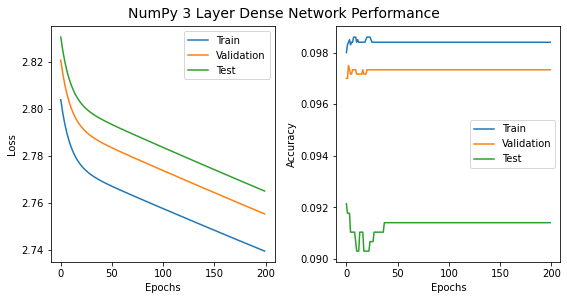

In [21]:
title = "NumPy 3 Layer Dense Network Performance"
plot_learning_history(title, loss_history, accuracy_history)